# Занятие №13

## ДЗ 1. Убрать из данных iris часть точек (на которых обучаемся) и убедиться, что на предсказания влияют только опорные вектора

C:\Users\Володя\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[4.8 1.9]
 [5.1 1.9]
 [5.1 3. ]]


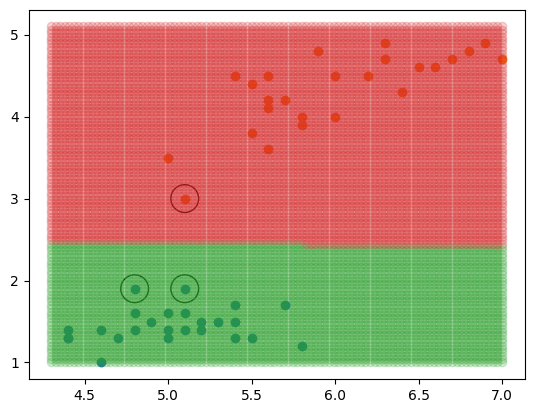

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC

iris = sns.load_dataset("iris")

data = iris[["sepal_length", "petal_length", "species"]]
data_df = data[(data["species"] == "setosa") | (data["species"] == "versicolor")]
X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]
data_df_setosa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]

for i in range(1, 50, 2):
    data_df_setosa = data_df_setosa.drop(i, axis=0) 
for i in range(51, 100, 2):
    data_df_versicolor = data_df_versicolor.drop(i, axis=0)  

plt.scatter(data_df_setosa["sepal_length"], data_df_setosa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

model = SVC(kernel="linear", C=10000)
model.fit(X, y)

print(model.support_vectors_)
plt.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=400,
    facecolor="none",
    edgecolors="black",
)

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)
X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
)
y_p = model.predict(X_p)
X_p["species"] = y_p
X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]
plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.2)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.2)


plt.show()

## Метод опорных веторов (SCM - support vector machine) - классификация и гегрессия

### Разделяющая классификация

Выбирается линия с максимальным отступом

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


C:\Users\Володя\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[4.8 1.9]
 [5.1 1.9]
 [5.1 3. ]]


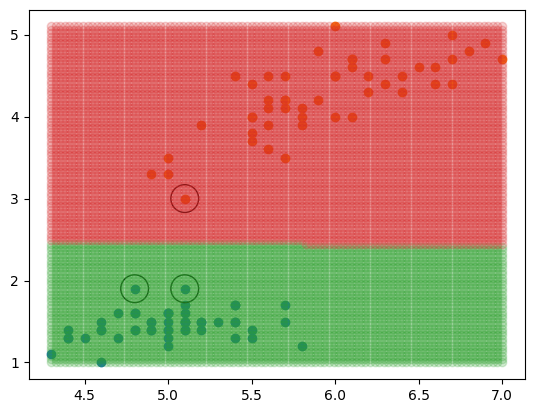

In [29]:
from sklearn.svm import SVC

data = iris[["sepal_length", "petal_length", "species"]]
data_df = data[(data["species"] == "setosa") | (data["species"] == "versicolor")]
X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]
data_df_setosa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]
plt.scatter(data_df_setosa["sepal_length"], data_df_setosa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

model = SVC(kernel="linear", C=10000)
model.fit(X, y)

print(model.support_vectors_)
plt.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=400,
    facecolor="none",
    edgecolors="black",
)

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)
X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
)
y_p = model.predict(X_p)
X_p["species"] = y_p
X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]
plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.2)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.2)


plt.show()

## 1. Убрать из данных iris часть точек (на которых обучаемся) и убедиться, что на предсказания влияют только опорные вектора

C:\Users\Володя\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[4.8 1.9]
 [5.1 1.9]
 [5.1 3. ]]


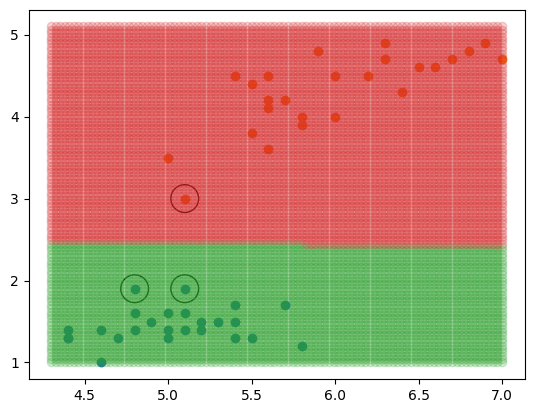

In [65]:
from sklearn.svm import SVC

data = iris[["sepal_length", "petal_length", "species"]]
data_df = data[(data["species"] == "setosa") | (data["species"] == "versicolor")]
X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]
data_df_setosa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]

for i in range(1, 50, 2):
    data_df_setosa = data_df_setosa.drop(i,axis=0)  # axis=0 означает строку
for i in range(51, 100, 2):
    data_df_versicolor = data_df_versicolor.drop(i, axis=0)  # axis=0 означает строку

plt.scatter(data_df_setosa["sepal_length"], data_df_setosa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

model = SVC(kernel="linear", C=10000)
model.fit(X, y)

print(model.support_vectors_)
plt.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=400,
    facecolor="none",
    edgecolors="black",
)

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)
X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
)
y_p = model.predict(X_p)
X_p["species"] = y_p
X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]
plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.2)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.2)


plt.show()

### В случае, если данные перекрываются, то идельной границы не существует. У модели существует гиперпарметр, который определит "размытие" отступа.

C:\Users\Володя\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Володя\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Володя\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

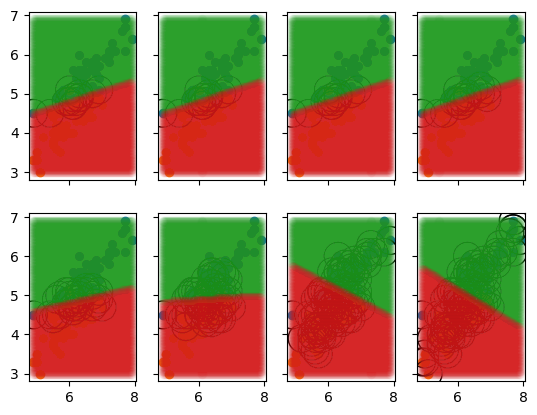

In [30]:
from sklearn.svm import SVC

data = iris[["sepal_length", "petal_length", "species"]]
data_df = data[(data["species"] == "virginica") | (data["species"] == "versicolor")]
X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]
data_df_virginica = data_df[data_df["species"] == "virginica"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]

c_value = [[10000, 1000, 100, 10], [1, 0.1, 0.01, 0.001]]
fig, ax=plt.subplots(2,4,sharex='col',sharey='row')

for i in range(2):
    for j in range(4):

        ax[i,j].scatter(data_df_virginica["sepal_length"], data_df_virginica["petal_length"])
        ax[i,j].scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

        'Если С большое, то отступ задается "жестко". Чем меньше С, тем отступ становится более "размытм".'
        model = SVC(kernel="linear", C=c_value[i][j])
        model.fit(X, y)

        # print(model.support_vectors_)
        ax[i, j].scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=400,
            facecolor="none",
            edgecolors="black",
        )

        x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
        x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)
        X1_p, X2_p = np.meshgrid(x1_p, x2_p)
        X_p = pd.DataFrame(
            np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
        )

        y_p = model.predict(X_p)
        X_p["species"] = y_p
        X_p_virginica = X_p[X_p["species"] == "virginica"]
        X_p_versicolor = X_p[X_p["species"] == "versicolor"]
        ax[i, j].scatter(
            X_p_virginica["sepal_length"], X_p_virginica["petal_length"], alpha=0.05
        )
        ax[i, j].scatter(
            X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.05
        )


plt.show()

Достоинства:

1. Модель зависит от небольшого числа опорных векторов => компактность модели
2. После обучения предсказания проходят очень быстро
3. На работу метода влияют ТОЛЬКО точки, находящиеся возле отступов, поэтому методы подходят для многомерных данных

Недостатки:

1. При большом количестве обучающих образцов могут быть значительные вычислительные затраты
2. Большая зависимость от размытых С. Поик может привести к большим вычислительным затратам
3. У результатов отсутсвует вероятностная интерпретация


## Деревья решений и случайные веса

### Случаные веса (СЛ) - непараметрический алгоритм

СЛ - пример ансамблевого метода, основанного на агрегации результатов множества простых моделей

### Дерево принятия решений

В реализации дерева принятия решений в машинном обучении, вопросы обычно ведут к разделению данных по осям, т.е. каждый узел разбивает данные на две группы по одному из признаков.

     0
0    1
1    1
2    1
3    1
4    1
..  ..
145  3
146  3
147  3
148  3
149  3

[150 rows x 1 columns]
     sepal_length  petal_length  species
0             5.1           1.4        1
1             4.9           1.4        1
2             4.7           1.3        1
3             4.6           1.5        1
4             5.0           1.4        1
..            ...           ...      ...
145           6.7           5.2        3
146           6.3           5.0        3
147           6.5           5.2        3
148           6.2           5.4        3
149           5.9           5.1        3

[150 rows x 3 columns]


C:\Users\Володя\AppData\Local\Temp\ipykernel_21012\1835115764.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["species"]=species_int_df


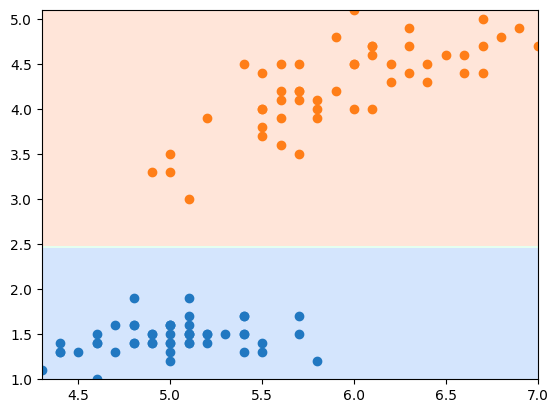

In [ ]:
from sklearn.tree import DecisionTreeClassifier

species_int = []
for r in iris.values:
    match r[4]:
        case "setosa":
            species_int.append(1)
        case "versicolor":
            species_int.append(2)
        case "virginica":
            species_int.append(3)

species_int_df = pd.DataFrame(species_int)
print(species_int_df)

data = iris[["sepal_length", "petal_length", "species"]]

data["species"] = species_int_df
print(data)

data_df = data[(data["species"] == 1) | (data["species"] == 2)]

X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]

data_df_setosa = data_df[data_df["species"] == 1]
data_df_versicolor = data_df[data_df["species"] == 2]

plt.scatter(data_df_setosa["sepal_length"], data_df_setosa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)
X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
)
y_p = model.predict(X_p)


# plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.1)
# plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.1)
plt.contourf(
    X1_p, X2_p, y_p.reshape(X1_p.shape), alpha=0.2, levels=2, cmap="rainbow", zorder=1
)

plt.show()

     0
0    1
1    1
2    1
3    1
4    1
..  ..
145  3
146  3
147  3
148  3
149  3

[150 rows x 1 columns]
     sepal_length  petal_length  species
0             5.1           1.4        1
1             4.9           1.4        1
2             4.7           1.3        1
3             4.6           1.5        1
4             5.0           1.4        1
..            ...           ...      ...
145           6.7           5.2        3
146           6.3           5.0        3
147           6.5           5.2        3
148           6.2           5.4        3
149           5.9           5.1        3

[150 rows x 3 columns]


C:\Users\Володя\AppData\Local\Temp\ipykernel_21012\1268404522.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["species"] = species_int_df


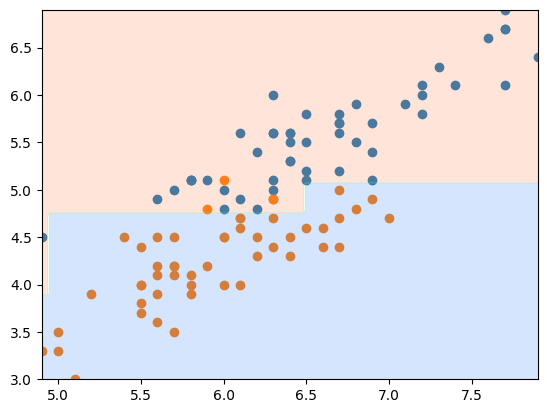

In [44]:
from sklearn.tree import DecisionTreeClassifier

species_int = []
for r in iris.values:
    match r[4]:
        case "setosa":
            species_int.append(1)
        case "versicolor":
            species_int.append(2)
        case "virginica":
            species_int.append(3)

species_int_df = pd.DataFrame(species_int)
print(species_int_df)

data = iris[["sepal_length", "petal_length", "species"]]

data["species"] = species_int_df
print(data)

data_df = data[(data["species"] == 3) | (data["species"] == 2)]

X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]

data_df_setosa = data_df[data_df["species"] == 3]
data_df_versicolor = data_df[data_df["species"] == 2]

plt.scatter(data_df_setosa["sepal_length"], data_df_setosa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)
X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
)
y_p = model.predict(X_p)


# plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.1)
# plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.1)
plt.contourf(
    X1_p, X2_p, y_p.reshape(X1_p.shape), alpha=0.2, levels=2, cmap="rainbow", zorder=1
)

plt.show()

     0
0    1
1    1
2    1
3    1
4    1
..  ..
145  3
146  3
147  3
148  3
149  3

[150 rows x 1 columns]
     sepal_length  petal_length  species
0             5.1           1.4        1
1             4.9           1.4        1
2             4.7           1.3        1
3             4.6           1.5        1
4             5.0           1.4        1
..            ...           ...      ...
145           6.7           5.2        3
146           6.3           5.0        3
147           6.5           5.2        3
148           6.2           5.4        3
149           5.9           5.1        3

[150 rows x 3 columns]


C:\Users\Володя\AppData\Local\Temp\ipykernel_21012\2509511819.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["species"] = species_int_df


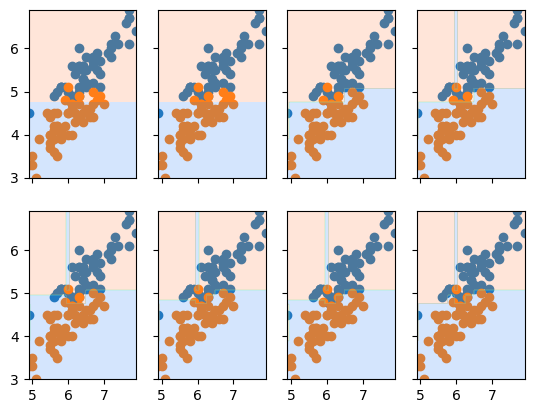

In [45]:
from sklearn.tree import DecisionTreeClassifier

species_int = []
for r in iris.values:
    match r[4]:
        case "setosa":
            species_int.append(1)
        case "versicolor":
            species_int.append(2)
        case "virginica":
            species_int.append(3)

species_int_df = pd.DataFrame(species_int)
print(species_int_df)

data = iris[["sepal_length", "petal_length", "species"]]

data["species"] = species_int_df
print(data)

data_df = data[(data["species"] == 3) | (data["species"] == 2)]

X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]

data_df_setosa = data_df[data_df["species"] == 3]
data_df_versicolor = data_df[data_df["species"] == 2]

max_depths = [[1, 2, 3, 4], [5, 6, 7, 8]]
fig, ax = plt.subplots(2, 4, sharex="col", sharey="row")

for i in range(2):
    for j in range(4):

        ax[i, j].scatter(
            data_df_virginica["sepal_length"], data_df_virginica["petal_length"]
        )
        ax[i, j].scatter(
            data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"]
        )

        model = DecisionTreeClassifier(max_depth=max_depths[i][j])
        model.fit(X, y)

        x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
        x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)
        X1_p, X2_p = np.meshgrid(x1_p, x2_p)
        X_p = pd.DataFrame(
            np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
        )
        y_p = model.predict(X_p)

        # plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.1)
        # plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.1)
        ax[i, j].contourf(
            X1_p,
            X2_p,
            y_p.reshape(X1_p.shape),
            alpha=0.2,
            levels=2,
            cmap="rainbow",
            zorder=1,
        )

plt.show()